In [48]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import MultiTaskLasso, Lasso

%matplotlib inline

In [2]:
rng = np.random.RandomState(42)

In [4]:
# Generate some 2D coefficients with sine waves with random frequency and phase
n_samples, n_features, n_tasks = 100, 30, 40
n_relevant_features = 5
coef = np.zeros((n_tasks, n_features))

In [5]:
coef

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [6]:
times = np.linspace(0, 2 * np.pi, n_tasks)

In [7]:
times

array([ 0.        ,  0.16110732,  0.32221463,  0.48332195,  0.64442926,
        0.80553658,  0.96664389,  1.12775121,  1.28885852,  1.44996584,
        1.61107316,  1.77218047,  1.93328779,  2.0943951 ,  2.25550242,
        2.41660973,  2.57771705,  2.73882436,  2.89993168,  3.061039  ,
        3.22214631,  3.38325363,  3.54436094,  3.70546826,  3.86657557,
        4.02768289,  4.1887902 ,  4.34989752,  4.51100484,  4.67211215,
        4.83321947,  4.99432678,  5.1554341 ,  5.31654141,  5.47764873,
        5.63875604,  5.79986336,  5.96097068,  6.12207799,  6.28318531])

In [8]:
for k in range(n_relevant_features):
    coef[:, k] = np.sin((1. + rng.randn(1)) * times + 3 * rng.randn(1))

In [36]:
X = rng.randn(n_samples, n_features)

In [37]:
Y = np.dot(X, coef.T) + rng.randn(n_samples, n_tasks)

In [38]:
X

array([[-0.90802408, -1.4123037 ,  1.46564877, ..., -0.71984421,
        -0.46063877,  1.05712223],
       [ 0.34361829, -1.76304016,  0.32408397, ...,  0.8219025 ,
         0.08704707, -0.29900735],
       [ 0.09176078, -1.98756891, -0.21967189, ...,  0.40405086,
         1.8861859 ,  0.17457781],
       ..., 
       [ 1.57811806,  0.98544969,  0.86915459, ...,  1.7473632 ,
         0.93219156, -0.23655529],
       [ 1.13562015, -1.10629351, -0.82451416, ..., -0.9600463 ,
        -0.12270893,  0.09337237],
       [-1.13020372,  2.41167668,  1.51639406, ...,  1.03837885,
        -1.51934608, -2.8321556 ]])

In [39]:
coef.T

array([[-0.4030004 , -0.17278973,  0.06741912, ...,  0.79420716,
         0.62612232,  0.42180801],
       [-0.9897502 , -0.99254832, -0.92581509, ...,  0.96797893,
         0.86821623,  0.70763205],
       [-0.64605975, -0.54721011, -0.4400406 , ..., -0.66027566,
        -0.74768514, -0.82372667],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [42]:
X.shape

(100, 30)

In [44]:
Y.T.shape

(40, 100)

## MultiTask Laso

In [45]:
coef_lasso_ = np.array([Lasso(alpha=0.5).fit(X, y).coef_ for y in Y.T])

In [46]:
coef_multi_task_lasso_ = MultiTaskLasso(alpha=1.).fit(X, Y).coef_

## Plot

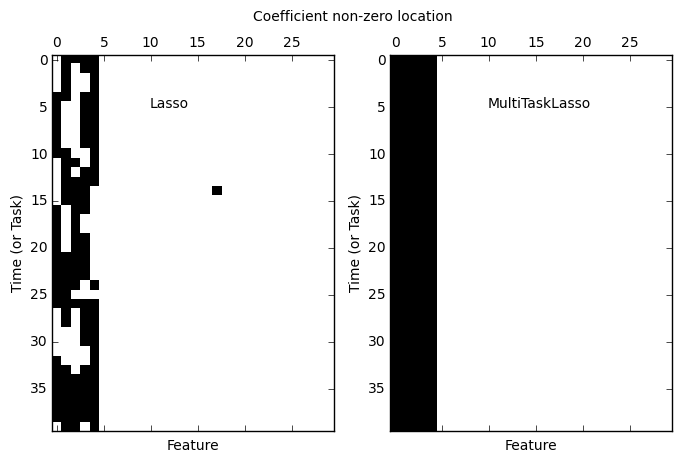

In [56]:
fig = plt.figure(figsize=(8, 5))

plt.subplot(1, 2, 1)
plt.spy(coef_lasso_)
plt.xlabel('Feature')
plt.ylabel('Time (or Task)')
plt.text(10, 5, 'Lasso')

plt.subplot(1, 2, 2)
plt.spy(coef_multi_task_lasso_)
plt.xlabel('Feature')
plt.ylabel('Time (or Task)')
plt.text(10, 5, 'MultiTaskLasso')

fig.suptitle('Coefficient non-zero location')

(-1.1, 1.1)

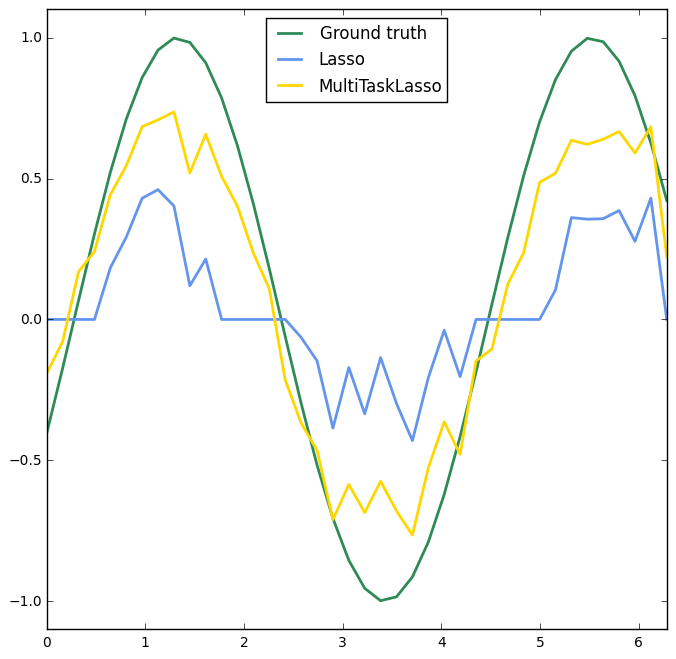

In [62]:
feature_to_plot = 0
plt.figure(figsize=(8, 8))
lw = 2
plt.plot(times, coef[:, feature_to_plot], color='seagreen', linewidth=lw,
         label='Ground truth')
plt.plot(times, coef_lasso_[:, feature_to_plot], color='cornflowerblue', linewidth=lw,
         label='Lasso')
plt.plot(times, coef_multi_task_lasso_[:, feature_to_plot], color='gold', linewidth=lw,
         label='MultiTaskLasso')

plt.legend(loc='upper center')
plt.axis('tight')
plt.ylim([-1.1, 1.1])

In [59]:
coef[:, feature_to_plot]

array([-0.4030004 , -0.17278973,  0.06741912,  0.30372688,  0.52246001,
        0.7109619 ,  0.85832521,  0.95602303,  0.99840224,  0.98301064,
        0.91073883,  0.78576871,  0.61533144,  0.40928909,  0.17956394,
       -0.06055137, -0.29716298, -0.51657977, -0.70610557, -0.85477379,
       -0.95398202, -0.99798973, -0.98425051, -0.91355933, -0.79000664,
       -0.62074158, -0.41555839, -0.18632964,  0.05368076,  0.29058501,
        0.51067506,  0.70121579,  0.85118189,  0.95189582,  0.99752996,
        0.98544376,  0.91633657,  0.79420716,  0.62612232,  0.42180801])